In [2]:
pip. install tensorflow

SyntaxError: invalid syntax (1058276524.py, line 1)

# Problem 1: Optimizing the descent direction

Let $C:R^d \rightarrow R$ be a differentiable function and $x_0 \in R^d$. We are required to solve the following optimisation problem.     $$\begin{aligned}
\min_{y \in R^d, ||y|| = 1} \quad & y^T \nabla C(x_0)\\
\end{aligned}$$ which can generally be written as     $$\begin{aligned}
\min_{y} \quad & y^T \nabla C(x_0)\\
\textrm{s.t.} \quad & ||y|| = 1\\
\end{aligned}$$

To solve an optimisation problem, we can use different methods. I will be using Lagrange which have two variables: $y, \lambda$ where $\lambda \in R, y \in R^d$. So we can define the lagrange function as follows: $L(y,\lambda) = y^T \nabla c(x_0) + \lambda (||y||-1)$ 

Then we take the derivatoves with respect to the two independent variables:
    $$\frac{\partial L(y,\lambda)}{\partial y} = \nabla_y L(y,\lambda) = \nabla_y C(x_0) + \lambda \frac{\partial ||y||}{\partial y}$$
    $$=\nabla_y + \lambda \frac{y}{||y||}$$
    $$\frac{\partial L(y,\lambda)}{\partial \lambda} = ||y|| - 1$$
Then we solve the partial derivatives as follows to get $\lambda, y$:
    $$\frac{\partial L(y,\lambda)}{\partial y} = \frac{\partial L(y,\lambda)}{\partial \lambda} = 0$$
    From the second euqation we can get that $$||y|| = 1$$ 
    We the substitute this value in the first equation we get:
    $$\nabla_y + \lambda \frac{y}{||y||} = \nabla_yC(x_0) + \lambda \frac{y}{1} = 0$$
    From this equation we can get the value of $y$ in terms of $\lambda$ as follows:
    $$y* = -\frac{1}{\lambda} \nabla_yC(x_0)$$
    putting this value in the equation $||y|| = 1$ we get
    $$||-\frac{1}{\lambda} \nabla_yC(x_0)|| = 1$$
    Since $\lambda$ is a constant we can put it outside and $||-x|| = ||x||$ so the value of lambda is 
    $$ \lambda = ||\nabla_yC(x_0)||$$
    Putting this value in the value of y we get:
    $$y* = -\frac{ \nabla_yC(x_0)}{||\nabla_yC(x_0)||}$$
    
We can say that the optimal direction from $x_0$ to optimize the $C$ is in the negative direction. so the magnitude of gradient of cost function at $x_0$ gives us the rate of change of $C$ of the steepest descent at $x_0$, so we normalize to obtain a unit vactorthat is in the opposite direction. So the optimal solution $y*$ tells us the direction we should move frm $x_0$ to optimize(minimize) the cost function.

# Problem 2: The name of softmax

Let $z \in R^d$ we want to find $$\lim_{C\to+\infty} softmax(Cz)$$.

We start by defining the softmax function which can be written as:
    $$softmax(z) = \frac{e^{z_i}}{\sum_{j=1}^{d} e^{z_j}}$$
    so then scaling the softmax by a scale $C$ we get 
    $$softmax(Cz) = \frac{e^{Cz_i}}{\sum_{j=1}^{d} e^{Cz_j}}$$
    
We can then evaluate the limit as follows:
    $$\lim_{C\to+\infty} softmax(Cz) = \lim_{C\to+\infty} \frac{e^{Cz_i}}{\sum_{j=1}^{d} e^{Cz_j}}$$
    $$= \frac{\infty}{\infty} I.C$$ Which can be solved by L'hopital's rule which is taking derivative on numerator and denominator w.r.t $C$
    $$\lim_{C\to+\infty} softmax(Cz) = \lim_{C\to+\infty} \frac{z_i e^{Cz_i}}{\sum_{j=1}^{d} z_j e^{Cz_j}}$$
    $$= \lim_{C\to+\infty} \frac{z_i e^{Cz_i}}{z_1e^{Cz_1} + z_2e^{Cz_2} +.....+z_1e^{Cz_1}} $$
    So we will have two case: 
    Let $L$ denote the number of $z_j$ which are equal to the maximum($z_{max}$)
    __Case 1: z_i = L__ 
    $$= \lim_{C\to+\infty} \frac{z_i e^{Cz_i}}{z_1e^{Cz_1} + z_2e^{Cz_2} +.....+z_1e^{Cz_1}} = \frac{e^{z_{max}}}{Le^{z_{max}}} = \frac{1}{L}$$
    __Case 2: z_i not equal to  z_{max}__
    $$= \lim_{C\to+\infty} \frac{z_i e^{Cz_i}}{z_1e^{Cz_1} + z_2e^{Cz_2} +.....+z_1e^{Cz_1}} = \frac{e^{z_i}}{e^{z_{max}}} = \frac{1}{\infty} = 0$$
    
The limit of softmax(Cz) as C approaches infinity is zero if the maximum component of z is non-positive, and infinity if the maximum component of z is positive. When C is large, softmax approaches a maximum function that picks the largest component of z, but when C is small, softmax distributes the weight more evenly among the components of z.

# Problem 3: ReLU of a gaussian

Let $G ∼ N (0, \sigma^2)$ be a gaussian random variable. Let $Y = ReLU(G)$. We need to find $E[Y], Var[Y]$.

**Given**:

-   ReLU function : $\text{ReLU}(x) = \max(0,x)$

-   if G is a Gaussian random variable with mean 0 and variance $\sigma^2$. Then
the probability density function of G is given by: $f_G(g) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{g^2}{2\sigma^2}}$

-   $c>0$

We calculate the expectation E\[Y\] using ReLU and probability density function as follows:
$$E[Y] = E[\text{ReLU}(G)] = \int_{-\infty}^{\infty} \text{ReLU}(g) f_G(g) dg$$
But ReLU function is always positive, so we get :
$$E[Y] = \int_{0}^{\infty} \text{ReLU}(g) f_G(g) dg$$
For g \> 0, we have:

$$\text{ReLU}(g) = g$$

so we can rewrite the integral as:

$$E[Y] = \int_{0}^{\infty} g f_G(g) dg$$

Using the formula for the probability density function of G, we get:

$$E[Y] = \frac{1}{\sqrt{2\pi\sigma^2}}\int_{0}^{\infty} g e^{-\frac{g^2}{2\sigma^2}} dg$$

Making the substitution $u = \frac{g^2}{2\sigma^2}$, we get:

$$E[Y] = \frac{\sigma}{\sqrt{2\pi}}\int_{0}^{\infty} e^{-u} du = \frac{\sigma}{\sqrt{2\pi}}$$

Then we find the variance Var\[Y\], uisng the definition of  Var\[Y\] = E\[Y\^2\] -
(E\[Y\])\^2. Since we already know the value of (E\[Y\])\^2 lets calculate
E\[Y\^2\]:

$$E[Y^2] = E[Y^2] = \int_{-\infty}^{\infty} Y^2 f_G(g) dg$$

Since the ReLU function is zero for negative values of g, we have:

$$E[Y^2] = \int_{0}^{\infty} g^2 f_G(g) dg$$

Using the formula for the probability density function of G, we get:

$$E[Y^2] = \frac{1}{\sqrt{2\pi\sigma^2}}\int_{0}^{\infty} g^2 e^{-\frac{g^2}{2\sigma^2}} dg$$

Making the substitution $u = \frac{g^2}{2\sigma^2}$, we get:

$$E[Y^2] = \frac{\sigma^2}{\sqrt{2\pi}}\int_{0}^{\infty} u e^{-u} du = \frac{\sigma^2}{2}$$

Therefore, we have:

$$\text{Var}[Y] = E[Y^2] - (E[Y])^2 = \frac{\sigma^2}{2} - \left(\frac{\sigma}{\sqrt{2\pi}}\right)^2 = \frac{\sigma^2}{2} - \frac{\sigma^2}{2\pi}$$

Simplifying, we get:
$$\text{Var}[Y] = \frac{\sigma^2}{2}\left(1 - \frac{1}{\pi}\right)$$

So the expected value of the ReLU of a Gaussian random variable with mean 0 and variance σ^2 is given by:

$$E[\text{ReLU}(G)] = \frac{\sigma}{\sqrt{2\pi}}$$

And the variance is given by:

$$\text{Var}[\text{ReLU}(G)] = \frac{\sigma^2}{2}\left(1 - \frac{1}{\pi}\right)$$

where G is a Gaussian random variable with mean 0 and variance σ^2, and ReLU is the Rectified Linear Unit function.

# Problem 4: Power of linear neural networks

Let $n \leq 3$ be an odd number. define $MAJ_n: \{-1,1\}^n \rightarrow \{-1,1\}$ as $$MAJ_n(x_1,...,x_n) = sgn \left (\sum_{i=1}^n x_i\right )$$.Considering a fully connected neural networks with one hidden layer, n inputs neurons and an output neuron. with an activation function given by $$\sigma(x) = x$$. __Proof of the existance of such neuron__

Given $b\in R^n, w \in R^{m\times n}, v\in R^{1\times m}, b' \in R$. define the weighted input into the first hidden layer as follows:
$$z_j = \sum_{i=1}^n w_{ij}x_i + b_j$$ where $1<j<m$ and $1<i<n$. 

Then we apply the activation function to get $$a_j = \sigma(z_j) = z_j$$

Also write the weighted input to the output layer is $$y = \sum_{j=1}^m v_j \left (\sum_{i=1}^n w_{ij}x_i + b_j\right) + b'$$
also written as:
$$y = \sum_{j=1}^m \sum_{i=1}^n v_jw_{ij}x_i + \sum_{i=1}^m b_j + b'$$

**Case 1: when $x_i = 1$**
$$y = \sum_{j=1}^m \sum_{i=1}^n v_jw_{ij} + \sum_{i=1}^m b_j + b' = 1$$
**Case 2: when $x_i = -1$**
$$y = -\sum_{j=1}^m \sum_{i=1}^n v_jw_{ij} + \sum_{i=1}^m b_j + b' = -1$$

Adding the above equations we get:
$$\sum_{j=1}^m v_jb_j + b' = 0$$

Then the output in the output layer will be $$y = \sum_{j=1}^m \sum_{i=1}^n v_jw_{ij}x_i$$

Consider the case where $\exists d \in 1:n$ where $x_d = 1$ and other $x_i = -1$ so we define our output as :
$$\sum_{i=1}^n v_d w_{di} - \sum_{d\neq j}^m \sum_{i=1}^n v_jw_{ij} = -1$$ Then we rewrite the value of the output as
$$y = \sum_{i=1}^n v_d w_{di} + \sum_{d\neq j}^m \sum_{i=1}^n v_jw_{ij}x_i = 1$$
Adding the two output functions we get:
$$v_d\sum_{i=1}^n w_{di} = 0$$

since weights are generated randomly then we can generalise the above formular as follows:
$$v_d\sum_{j=1}^n w_{ji} = 0, \forall j$$

So from the equation above we get a contradiction that such network can never exist. Hence proved


# Problem 5: Early stopping and variable learning rate

# Early stopping

The code below implements early stopping as a form of regularization to prevent overfitting during training. The basic idea is to monitor the performance of the network on a separate validation set during training, and stop training early if the validation accuracy does not improve for a certain number of epochs (determined by the early_stopping parameter).

If the validation accuracy does not improve for early_stopping epochs, training is stopped and the network parameters at the best validation accuracy are returned. This helps to prevent overfitting to the training set, since the network is trained only until it performs well on the validation set.

The effect of early stopping is that it can improve the generalization performance of the network by preventing overfitting. However, it can also result in underfitting if the network is stopped too early, i.e., before it has converged to a good solution. Therefore, it is important to set the early_stopping parameter appropriately and monitor the training and validation performance carefully.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import gzip

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.15.0


In [2]:
IMG_LEN = 28
IMG_SIZE = IMG_LEN**2

In [3]:
class QuadraticLoss(object):
    @staticmethod
    def loss(a, y):
        return 0.5*np.dot(a-y, a-y)
    @staticmethod
    def loss_derivative(a, y):
        return a-y

In [4]:
class CrossEntropyLoss(object):
    @staticmethod
    def loss(a, y):
        return np.sum(np.nan_to_num(-y*np.log(a)-(1-y)*np.log(1-a)))
    @staticmethod
    def loss_derivative(a, y):
        return (a-y)/(a*(1.0-a))

In [20]:
class Network(object):
    def __init__(self, n, *, loss=QuadraticLoss, init='standard'):
        # Initialize the weights randomly
        if init == 'standard':
            self.W = np.random.randn(n, IMG_SIZE)
            self.V = np.random.randn(10, n)
        elif init == 'normalized':
            self.W = np.random.randn(n, IMG_SIZE) / np.sqrt(IMG_SIZE)
            self.V = np.random.randn(10, n) / np.sqrt(n)
        
        self.b = np.random.randn(n)
        self.bprime = np.random.randn(10)
        self.loss = loss
        
    def feedforward(self, x):
        # Return the output of a feedforward pass
        a = sigmoid(np.dot(self.W, x)+self.b)
        return sigmoid(np.dot(self.V, a)+self.bprime)
    
    def evaluate(self, data, lmbda=0):
        """ Return (cost, accuracy) on the data"""
        correct_samples = 0
        total_cost = 0
        n_samples = len(data)
        
        for x, ylabel in data:
            y = self.feedforward(x)
            prediction = np.argmax(y)
            if prediction == ylabel:
                correct_samples += 1
            
            total_cost += self.loss.loss(y, Network.vec_output[ylabel])
        
        average_cost = total_cost / n_samples
        average_cost += 0.5*lmbda*(
            np.linalg.norm(self.W)**2 + np.linalg.norm(self.V)**2)
        
        return average_cost, correct_samples / n_samples
            
    
    def update_mini_batch(self, mini_batch, eta, lmbda):
        # Run backprop and update weights on the minibatch
        k = len(mini_batch)
        delta_W = np.zeros(self.W.shape)
        delta_b = np.zeros(self.b.shape)
        delta_V = np.zeros(self.V.shape)
        delta_bprime = np.zeros(self.bprime.shape)
        
        for x, y in mini_batch:
            nabla_W, nabla_b, nabla_V, \
                nabla_bprime = self.backprop(x, y)
            delta_W += nabla_W
            delta_b += nabla_b
            delta_V += nabla_V
            delta_bprime += nabla_bprime
        
        self.W -= eta*(lmbda*self.W + 1/k * delta_W)
        self.b -= eta/k * delta_b
        self.V -= eta*(lmbda*self.V + 1/k * delta_V)
        self.bprime -= eta/k * delta_bprime

    def SGD(self, training_data, mini_batch_size, eta, test_data = [], lmbda=0
            , early_stopping=10, tol = 0.001):
        # Initialize variables for early stopping
        best_val_acc = 0
        epochs_without_improvement = 0
        epoch = 0

        res = []

        while epochs_without_improvement < early_stopping:
            # Shuffle the training data
            np.random.shuffle(training_data)
            for j in range(0, len(training_data), mini_batch_size):
                    mini_batch = training_data[j:j+mini_batch_size]
                    self.update_mini_batch(mini_batch, eta, lmbda)

            train_cost, train_acc = self.evaluate(training_data, lmbda)
            test_cost, test_acc = self.evaluate(test_data, lmbda)
            res.append((train_cost, train_acc, test_cost, test_acc))


            if (train_acc - best_val_acc)< tol:
                epochs_without_improvement += 1
               
            else:
                epochs_without_improvement = 0
            
            best_val_acc = train_acc

        return res, epoch
        
    def backprop(self, x, ylabel):
        # feedforward
        z1 = np.dot(self.W, x)+self.b
        a1 = sigmoid(z1)
        z2 = np.dot(self.V, a1)+self.bprime
        a2 = sigmoid(z2)
        
        # backward
        delta_2 = self.loss.loss_derivative(a2, Network.vec_output[ylabel]) * sigmoid_prime(z2)
        nabla_bprime = delta_2
        nabla_V = np.outer(delta_2, a1)
        
        delta_1 = np.dot(self.V.transpose(), delta_2) * sigmoid_prime(z1)
        nabla_b = delta_1
        nabla_W = np.outer(delta_1, x)
        
        return nabla_W, nabla_b, nabla_V, nabla_bprime
    
    vec_output = []
    for ylabel in range(10):
        V = np.zeros(10)
        V[ylabel] = 1
        vec_output.append(V)

In [21]:
def sigmoid(z):
    return 1 / (1.0+np.exp(-z))
def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

In [22]:
def load_data():
    # Note you have to update the path below
    f = gzip.open('mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
    f.close()
    return training_data, validation_data, test_data

In [23]:
TRAIN, VALIDATION, TEST = load_data()

In [24]:
def zip_data(D):
    return list(zip(D[0], D[1]))
train_data = zip_data(TRAIN)
validation_data = zip_data(VALIDATION)
test_data = zip_data(TEST)

In [25]:
NET = Network(30)

In [26]:
results = NET.SGD(train_data,10, 3,test_data)

In [27]:
results

([(0.09169238011967447, 0.88952, 0.09185440094445046, 0.8863),
  (0.0638864591854551, 0.91996, 0.06520238404976186, 0.9188),
  (0.0561798864758781, 0.93064, 0.05907595413003845, 0.9285),
  (0.052902320712857, 0.93628, 0.056537325638313166, 0.9321),
  (0.04867597873953349, 0.9416, 0.05381363636003624, 0.9368),
  (0.049094472805613916, 0.94198, 0.05406368737985452, 0.9356),
  (0.0465253348899741, 0.94622, 0.053933584034757426, 0.9372),
  (0.043350474395163895, 0.94842, 0.051197983556948684, 0.9383),
  (0.04108669228880043, 0.95166, 0.04990746318036264, 0.9414),
  (0.0407960316051081, 0.95114, 0.04980121333458977, 0.9392),
  (0.03933960627954261, 0.95338, 0.04804567765103793, 0.9431),
  (0.03792046506247093, 0.95534, 0.04759144185699238, 0.9442),
  (0.03907503946368302, 0.95422, 0.04932685584275804, 0.9425),
  (0.03589865340645504, 0.95796, 0.04583501395851755, 0.9482),
  (0.037304657527079815, 0.95788, 0.049243578363090644, 0.9445),
  (0.034527210351501976, 0.95984, 0.04717071221832707, 

#  Variable learning rate

The code above includes a variable learning rate implemented using a simple learning rate schedule. The learning rate eta is divided by 10 after every 3 epochs of training. This means that the learning rate decreases over time as the model approaches convergence, which can help it avoid overshooting the minimum and achieve better performance.

As can be seen, the learning rate eta is updated by dividing it by 10 at the start of each loop, and then used in self.update_mini_batch function to update the model weights during training. This process is repeated for a total of three times, each time training the model for a certain number of epochs (until early stopping conditions are met).

In [28]:
class Network(object):
    def __init__(self, n, *, loss=QuadraticLoss, init='standard'):
        # Initialize the weights randomly
        if init == 'standard':
            self.W = np.random.randn(n, IMG_SIZE)
            self.V = np.random.randn(10, n)
        elif init == 'normalized':
            self.W = np.random.randn(n, IMG_SIZE) / np.sqrt(IMG_SIZE)
            self.V = np.random.randn(10, n) / np.sqrt(n)
        
        self.b = np.random.randn(n)
        self.bprime = np.random.randn(10)
        self.loss = loss
        
    def feedforward(self, x):
        # Return the output of a feedforward pass
        a = sigmoid(np.dot(self.W, x)+self.b)
        return sigmoid(np.dot(self.V, a)+self.bprime)
    
    def evaluate(self, data, lmbda=0):
        """ Return (cost, accuracy) on the data"""
        correct_samples = 0
        total_cost = 0
        n_samples = len(data)
        
        for x, ylabel in data:
            y = self.feedforward(x)
            prediction = np.argmax(y)
            if prediction == ylabel:
                correct_samples += 1
            
            total_cost += self.loss.loss(y, Network.vec_output[ylabel])
        
        average_cost = total_cost / n_samples
        average_cost += 0.5*lmbda*(
            np.linalg.norm(self.W)**2 + np.linalg.norm(self.V)**2)
        
        return average_cost, correct_samples / n_samples
            
    
    def update_mini_batch(self, mini_batch, eta, lmbda):
        # Run backprop and update weights on the minibatch
        k = len(mini_batch)
        delta_W = np.zeros(self.W.shape)
        delta_b = np.zeros(self.b.shape)
        delta_V = np.zeros(self.V.shape)
        delta_bprime = np.zeros(self.bprime.shape)
        
        for x, y in mini_batch:
            nabla_W, nabla_b, nabla_V, \
                nabla_bprime = self.backprop(x, y)
            delta_W += nabla_W
            delta_b += nabla_b
            delta_V += nabla_V
            delta_bprime += nabla_bprime
        
        self.W -= eta*(lmbda*self.W + 1/k * delta_W)
        self.b -= eta/k * delta_b
        self.V -= eta*(lmbda*self.V + 1/k * delta_V)
        self.bprime -= eta/k * delta_bprime

    def SGD(self, training_data, mini_batch_size, eta, test_data = [], lmbda=0
            , early_stopping=10, tol = 0.001):
        # Initialize variables for early stopping
        best_val_acc = 0
        epochs_without_improvement = 0
        epoch = 0
        res = []
        for i in range(3):
            best_val_acc = 0
            epochs_without_improvement = 0
            epoch = 0
            eta = eta/10
            while epochs_without_improvement <= early_stopping:
                # Shuffle the training data
                np.random.shuffle(training_data)
                for j in range(0, len(training_data), mini_batch_size):
                        mini_batch = training_data[j:j+mini_batch_size]
                        self.update_mini_batch(mini_batch, eta, lmbda)

                train_cost, train_acc = self.evaluate(training_data, lmbda)
                test_cost, test_acc = self.evaluate(test_data, lmbda)
                res.append((train_cost, train_acc, test_cost, test_acc))


                if (train_acc - best_val_acc)< tol:
                    epochs_without_improvement += 1

                else:
                    epochs_without_improvement = 0

                best_val_acc = train_acc

        return res, epoch
        
    def backprop(self, x, ylabel):
        # feedforward
        z1 = np.dot(self.W, x)+self.b
        a1 = sigmoid(z1)
        z2 = np.dot(self.V, a1)+self.bprime
        a2 = sigmoid(z2)
        
        # backward
        delta_2 = self.loss.loss_derivative(a2, Network.vec_output[ylabel]) * sigmoid_prime(z2)
        nabla_bprime = delta_2
        nabla_V = np.outer(delta_2, a1)
        
        delta_1 = np.dot(self.V.transpose(), delta_2) * sigmoid_prime(z1)
        nabla_b = delta_1
        nabla_W = np.outer(delta_1, x)
        
        return nabla_W, nabla_b, nabla_V, nabla_bprime
    
    vec_output = []
    for ylabel in range(10):
        V = np.zeros(10)
        V[ylabel] = 1
        vec_output.append(V)

In [29]:
NET2 = Network(30)

In [30]:
results = NET2.SGD(train_data, 10, 3, test_data)

In [31]:
results

([(0.2725090904675947, 0.56362, 0.2707898281723795, 0.5656),
  (0.17856628312049294, 0.7499, 0.1768998636702614, 0.7501),
  (0.12098326237157477, 0.85156, 0.11618021517890224, 0.8574),
  (0.10290921972645803, 0.87204, 0.09944820882600404, 0.8751),
  (0.09250627598156576, 0.8862, 0.08977012202652945, 0.8894),
  (0.08631643672213937, 0.89282, 0.0847510139013321, 0.8958),
  (0.0811523409306929, 0.89936, 0.0805112110674262, 0.9025),
  (0.07682442914276061, 0.90406, 0.07647216773098399, 0.9055),
  (0.07380867097030848, 0.9074, 0.07426424626344957, 0.9085),
  (0.07039379419292442, 0.91246, 0.07153752548963008, 0.9123),
  (0.06826952258621896, 0.91478, 0.06942726297440914, 0.9153),
  (0.06568953740486791, 0.91846, 0.06774342430940734, 0.9161),
  (0.06374649127351287, 0.92096, 0.0658854634119148, 0.9193),
  (0.062066632134470556, 0.92314, 0.0649863531306896, 0.92),
  (0.060826929951525874, 0.92474, 0.0640168052508601, 0.9198),
  (0.05882218128173874, 0.92768, 0.06248056722742417, 0.9232),
  (0

# Problem 6: Implementing convolutional neural networks

In [49]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [50]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

train_data = train_data / 255.0
test_data = test_data / 255.0

train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

### Implement the neural network from the lecture slide “MNIST example: architecture 1”. 

The code below defines a neural network with a convolutional layer and two fully connected layers. The neural network is used for classification tasks. The convolutional layer performs feature extraction on the input image, followed by max pooling. The fully connected layers then process the features extracted by the convolutional layer to produce a final classification output. The network is trained using backpropagation and stochastic gradient descent. The evaluate function computes the accuracy and cost of the network on a given dataset.

In [108]:
class Network(object):
    def __init__(self, n):

        # Initialize the weights randomly
        self.W = np.random.randn(n, 2880)
        self.b = np.random.randn(n)
        self.V = np.random.randn(10, n)
        self.bprime = np.random.randn(10)
        
    def ConvLayer(self, input_tensor):
        
        # Define weight tensor with 20 filters
        num_filters = 20
        filter_height, filter_width = 5, 5

        weight_tensor = np.random.randn(num_filters, filter_height, filter_width)

        # Define bias tensor for each filter
        bias_tensor = np.random.randn(num_filters)

        # Define stride and padding
        stride = 1
        padding = 0
        
        # Define pooling parameters
        pool_size = 2
        pool_stride = 2

        # Compute output shape
        input_height, input_width = input_tensor.shape
        conv_output_height = int((input_height - filter_height + 2 * padding) / stride) + 1
        conv_output_width = int((input_width - filter_width + 2 * padding) / stride) + 1

        # Initialize output tensor
        conv_output_tensor = np.zeros((num_filters, conv_output_height, conv_output_width))

        # Perform matrix multiplication with weights
        for k in range(num_filters):
            for i in range(conv_output_height):
                for j in range(conv_output_width):
                    conv_output_tensor[k][i][j] = np.sum(
                        input_tensor[i:i+filter_height, j:j+filter_width] * weight_tensor[k]) \
                    + bias_tensor[k]       
        
        # Apply ReLU activation function to convolutional output tensor
        conv_output_tensor = np.maximum(conv_output_tensor, 0)
        
        # Compute output shape for max pooling
        pool_output_height = int((conv_output_height - pool_size) / pool_stride) + 1
        pool_output_width = int((conv_output_width - pool_size) / pool_stride) + 1

        # Initialize output tensor for max pooling
        pool_output_tensor = np.zeros((num_filters, pool_output_height, pool_output_width))

        # Perform max pooling
        for k in range(num_filters):
            for i in range(pool_output_height):
                for j in range(pool_output_width):
                    pool_output_tensor[k][i][j] = np.max(
                        conv_output_tensor[k][i*pool_stride:i*pool_stride+pool_size, \
                                              j*pool_stride:j*pool_stride+pool_size])
        return pool_output_tensor.flatten()
        
    def feedforward(self, x):
        # Return the output of a feedforward pass
        conv_output = self.ConvLayer(x)
        a = np.maximum(np.dot(self.W, conv_output) + self.b, 0)
        return sigmoid(np.dot(self.V, a)+self.bprime)

    def evaluate(self, data):
        """ Return (cost, accuracy) on the data"""
        correct_samples = 0
        total_cost = 0
        n_samples = len(data)

        for x, ylabel in data:
            y = self.feedforward(x)
            prediction = np.argmax(y)
            if prediction == ylabel:
                correct_samples += 1

            y[ylabel] -= 1.0
            total_cost += np.dot(y, y)

        return correct_samples / n_samples


In [109]:
NET3 = Network(30)

In [110]:
def zip_data(D0,D1):
    return list(zip(D0, D1))


In [111]:
NET3.feedforward(train_data[0])

array([1.00000000e+00, 1.20091504e-40, 3.33466272e-76, 1.00000000e+00,
       1.00000000e+00, 1.17239705e-81, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00])

In [119]:
train_set = zip_data(train_data[:1000], train_labels[:1000])
test_set = zip_data(test_data[:100], test_labels[:100])

The output of 0.094 for NET3.evaluate(train_set) on the MNIST dataset does not make sense. This indicates that the network is performing poorly on the training set, with only 9.4% of the samples being classified correctly. The network needs to be improved by adjusting the hyperparameters, such as the learning rate, number of layers, number of nodes in each layer, or regularization techniques, such as dropout or weight decay. Additionally, it may be necessary to further tune the hyperparameters through experimentation to achieve better performance on the dataset.

In [120]:
NET3.evaluate(train_set)

<ipython-input-21-46a8ef3da670>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1.0+np.exp(-z))


0.094

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt




Epoch 1/10


750/750 [==============================] - 23s 26ms/step - loss: 0.5727 - accuracy: 0.7892 - val_loss: 0.4278 - val_accuracy: 0.8426
Epoch 2/10
750/750 [==============================] - 19s 25ms/step - loss: 0.3640 - accuracy: 0.8682 - val_loss: 0.3666 - val_accuracy: 0.8707
Epoch 3/10
750/750 [==============================] - 19s 25ms/step - loss: 0.3088 - accuracy: 0.8868 - val_loss: 0.3084 - val_accuracy: 0.8862
Epoch 4/10
750/750 [==============================] - 19s 26ms/step - loss: 0.2765 - accuracy: 0.8999 - val_loss: 0.3093 - val_accuracy: 0.8894
Epoch 5/10
750/750 [==============================] - 26s 35ms/step - loss: 0.2521 - accuracy: 0.9072 - val_loss: 0.2753 - val_accuracy: 0.8990
Epoch 6/10
750/750 [==============================] - 27s 36ms/step - loss: 0.2301 - accuracy: 0.9162 - val_loss: 0.2611 - val_accuracy: 0.9054
Epoch 7/10
750/750 [==============================] - 26s 35ms/step - loss: 0.2122 - accuracy: 0.9218 - val_loss: 0.2699 - val_accu

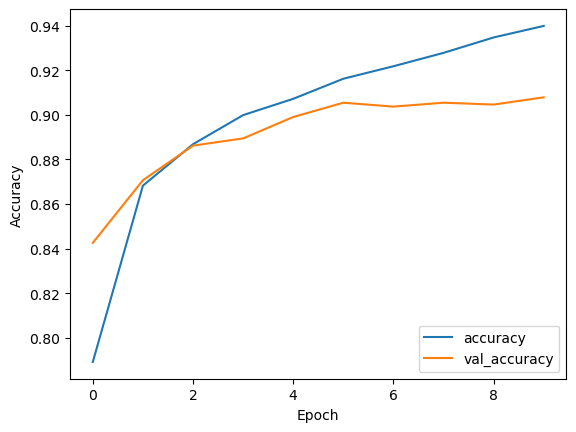

In [6]:
# Step 2: Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Step 3: Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

# Step 4: Build a convolutional neural network model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Step 5: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Step 7: Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
